<a href="https://colab.research.google.com/github/efsiul/Model-Severity-Accidents/blob/main/08_MODELO_%C3%81rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes:**

Luis Felipe Cadavid Chica - 98711955 - Ingenieria de Sistemas.

Cristian Alexander Castaño Montoya - 1001409163 - Ingenieria de Sistemas.

Importing the Pandas library for dataset management and management. Then the dataset that was downloaded from https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?select=US_Accidents_Dec21_updated.csv is read.

In [ ]:
# Carga nuestros datos reducidos desde GitHub
! git clone https://github.com/cristiancastano852/Model-Severity-Accidents

fatal: destination path 'Model-Severity-Accidents' already exists and is not an empty directory.


## Importación de librerias

In [ ]:
import time
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer 
from scipy.spatial.distance import cdist 
from scipy.stats import skew, norm
from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

## Cargamos nuestro dataset

In [ ]:
#Leemos nuestros datos
df = pd.read_csv('/content/Model-Severity-Accidents/Reduced_dataset.csv')
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1786515,2,2020-12-01 12:03:00,2020-12-02 00:09:22,28.257513,-81.436229,28.260315,-81.437122,0.201,Stationary traffic on US-92 W - US-17 S from O...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-270134,2,2021-12-12 06:17:38,2021-12-12 09:02:47,47.461591,-92.901602,47.477781,-92.902962,1.120,Construction on US-169 near COUNTY HWY-5 Drive...,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-2689947,2,2018-02-12 07:34:42,2018-02-12 13:34:42,37.694424,-122.103225,37.694424,-122.103225,0.000,At 163rd Ave/164th Ave/Carolyn St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-191424,2,2017-05-19 17:14:48,2017-05-19 23:14:48,42.706440,-73.830750,42.713740,-73.819670,0.756,At RT-5/Wolf Rd/Exit 2 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2142330,2,2020-06-24 18:29:14,2020-06-24 18:59:14,43.034760,-89.409920,43.034760,-89.409920,0.000,At CR-D/Fish Hatchery Rd/Exit 260 - Accident. ...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-701562,2,2021-11-06 12:56:45.000000,2021-11-06 15:55:28.000000,40.728194,-74.102176,40.723675,-74.089130,0.751,Slow traffic on US-1 Trk N - US-9 Trk N from S...,...,False,False,False,False,False,False,Day,Day,Day,Day
99996,A-743880,2,2021-03-24 05:18:30,2021-03-24 13:54:34,25.809384,-80.323373,25.809874,-80.329373,0.375,Stationary traffic on FL-948 from FL-826/Palme...,...,False,False,False,False,False,False,Night,Night,Night,Night
99997,A-1108176,2,2021-08-16 16:24:24,2021-08-16 17:05:25,38.292666,-77.479169,38.290757,-77.471943,0.413,Stationary traffic on VA-3 - US-1 Bus N from W...,...,False,False,False,False,False,False,Day,Day,Day,Day
99998,A-2255283,2,2020-04-13 19:09:00,2020-04-13 20:07:19,39.622410,-105.195060,39.622450,-105.195010,0.004,At CR-120/S Parmalee Gulch Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## **01. PRE-PROCESAMIENTO**

## Eliminar datos duplicados:

In [ ]:
df.drop_duplicates(inplace=True)
df


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1786515,2,2020-12-01 12:03:00,2020-12-02 00:09:22,28.257513,-81.436229,28.260315,-81.437122,0.201,Stationary traffic on US-92 W - US-17 S from O...,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-270134,2,2021-12-12 06:17:38,2021-12-12 09:02:47,47.461591,-92.901602,47.477781,-92.902962,1.120,Construction on US-169 near COUNTY HWY-5 Drive...,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-2689947,2,2018-02-12 07:34:42,2018-02-12 13:34:42,37.694424,-122.103225,37.694424,-122.103225,0.000,At 163rd Ave/164th Ave/Carolyn St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-191424,2,2017-05-19 17:14:48,2017-05-19 23:14:48,42.706440,-73.830750,42.713740,-73.819670,0.756,At RT-5/Wolf Rd/Exit 2 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2142330,2,2020-06-24 18:29:14,2020-06-24 18:59:14,43.034760,-89.409920,43.034760,-89.409920,0.000,At CR-D/Fish Hatchery Rd/Exit 260 - Accident. ...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-701562,2,2021-11-06 12:56:45.000000,2021-11-06 15:55:28.000000,40.728194,-74.102176,40.723675,-74.089130,0.751,Slow traffic on US-1 Trk N - US-9 Trk N from S...,...,False,False,False,False,False,False,Day,Day,Day,Day
99996,A-743880,2,2021-03-24 05:18:30,2021-03-24 13:54:34,25.809384,-80.323373,25.809874,-80.329373,0.375,Stationary traffic on FL-948 from FL-826/Palme...,...,False,False,False,False,False,False,Night,Night,Night,Night
99997,A-1108176,2,2021-08-16 16:24:24,2021-08-16 17:05:25,38.292666,-77.479169,38.290757,-77.471943,0.413,Stationary traffic on VA-3 - US-1 Bus N from W...,...,False,False,False,False,False,False,Day,Day,Day,Day
99998,A-2255283,2,2020-04-13 19:09:00,2020-04-13 20:07:19,39.622410,-105.195060,39.622450,-105.195010,0.004,At CR-120/S Parmalee Gulch Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Eliminar todas las filas con valores faltantes:

In [ ]:
df.dropna(inplace=True)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1786515,2,2020-12-01 12:03:00,2020-12-02 00:09:22,28.257513,-81.436229,28.260315,-81.437122,0.201,Stationary traffic on US-92 W - US-17 S from O...,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-1441160,2,2021-11-02 03:16:00,2021-11-02 04:33:30,30.499671,-91.141074,30.502041,-91.141152,0.164,Incident on N FOSTER DR near HOLLYWOOD ST Expe...,...,False,False,False,False,True,False,Night,Night,Night,Night
7,A-472662,2,2021-12-23 17:45:18,2021-12-23 21:10:39,28.450381,-81.399122,28.449707,-81.401108,0.129,Slow traffic on FL-482 - US-92 W - US-441 S - ...,...,False,False,False,False,False,False,Night,Day,Day,Day
15,A-1057215,2,2021-10-19 17:39:00,2021-10-19 19:40:34,33.962013,-118.231992,33.957410,-118.229918,0.340,Slow traffic from E 83rd St to Calden Ave due ...,...,False,False,False,False,False,False,Day,Day,Day,Day
17,A-2362363,2,2020-01-06 10:14:00,2020-01-06 11:27:36,33.977722,-118.075771,33.977722,-118.075771,0.000,At Saragosa St - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,A-1774938,2,2020-12-02 14:07:00,2020-12-03 02:04:30,39.957860,-75.608497,39.958806,-75.603472,0.274,Stationary traffic on US-322 Bus W - US-322 Bu...,...,False,False,False,False,True,False,Day,Day,Day,Day
99989,A-1560015,2,2021-02-08 23:39:09,2021-02-09 01:18:06,34.657186,-83.041877,34.655588,-83.039598,0.170,Incident on COMMERCE WAY near SC-11 Drive with...,...,False,False,False,False,False,False,Night,Night,Night,Night
99991,A-1495718,2,2021-11-17 16:05:00,2021-11-17 19:02:54,33.954708,-118.044731,33.952333,-118.041286,0.257,Slow traffic from Santa Fe Springs Rd (Mulberr...,...,False,False,False,False,False,False,Day,Day,Day,Day
99995,A-701562,2,2021-11-06 12:56:45.000000,2021-11-06 15:55:28.000000,40.728194,-74.102176,40.723675,-74.089130,0.751,Slow traffic on US-1 Trk N - US-9 Trk N from S...,...,False,False,False,False,False,False,Day,Day,Day,Day


Como pudimos notar, perdimos bastantes datos, pero al tener un dataset tan grande, nos queda igual 33.306 rows que seran suficiente para nuestro modelo

## Selección de características basada en la correlación

In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(to_drop, axis=1, inplace=True)
df

<ipython-input-6-a1031f2d808e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1786515,2,2020-12-01 12:03:00,2020-12-02 00:09:22,28.257513,-81.436229,0.201,Stationary traffic on US-92 W - US-17 S from O...,1682.0,Pleasant Hill Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-1441160,2,2021-11-02 03:16:00,2021-11-02 04:33:30,30.499671,-91.141074,0.164,Incident on N FOSTER DR near HOLLYWOOD ST Expe...,5098.0,Hollywood St,...,False,False,False,False,True,False,Night,Night,Night,Night
7,A-472662,2,2021-12-23 17:45:18,2021-12-23 21:10:39,28.450381,-81.399122,0.129,Slow traffic on FL-482 - US-92 W - US-441 S - ...,1631.0,Sand Lake Rd,...,False,False,False,False,False,False,Night,Day,Day,Day
15,A-1057215,2,2021-10-19 17:39:00,2021-10-19 19:40:34,33.962013,-118.231992,0.340,Slow traffic from E 83rd St to Calden Ave due ...,8404.0,S Alameda St,...,False,False,False,False,False,False,Day,Day,Day,Day
17,A-2362363,2,2020-01-06 10:14:00,2020-01-06 11:27:36,33.977722,-118.075771,0.000,At Saragosa St - Accident.,10882.0,Saragosa St,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,A-1774938,2,2020-12-02 14:07:00,2020-12-03 02:04:30,39.957860,-75.608497,0.274,Stationary traffic on US-322 Bus W - US-322 Bu...,299.0,W Market St,...,False,False,False,False,True,False,Day,Day,Day,Day
99989,A-1560015,2,2021-02-08 23:39:09,2021-02-09 01:18:06,34.657186,-83.041877,0.170,Incident on COMMERCE WAY near SC-11 Drive with...,7230.0,S Highway 11,...,False,False,False,False,False,False,Night,Night,Night,Night
99991,A-1495718,2,2021-11-17 16:05:00,2021-11-17 19:02:54,33.954708,-118.044731,0.257,Slow traffic from Santa Fe Springs Rd (Mulberr...,13222.0,Mulberry Dr,...,False,False,False,False,False,False,Day,Day,Day,Day
99995,A-701562,2,2021-11-06 12:56:45.000000,2021-11-06 15:55:28.000000,40.728194,-74.102176,0.751,Slow traffic on US-1 Trk N - US-9 Trk N from S...,182.0,Lincoln Hwy,...,False,False,False,False,False,False,Day,Day,Day,Day


## Convertimos las variables categoricas en variables numericas usando la codificación One-Hot

Reducimos el dataset a 7000, porque el entorno de colab no nos da RAM suficiente para procesar más

In [ ]:
df = df.sample(n=7000, random_state=42)

In [ ]:
#Variables categoricas
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
enc = LabelEncoder()
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
33161,6094,2,3913,3915,38.755849,-76.993077,0.716,6327,9701.0,2913,...,False,False,False,False,True,False,0,0,0,0
38051,2322,2,2639,2638,37.983387,-121.260446,0.134,3155,2287.0,655,...,False,False,False,False,False,False,1,1,1,1
59978,6411,2,5327,5334,28.546678,-81.206051,0.154,5831,12210.0,1995,...,False,False,False,False,False,False,0,0,0,0
15349,1264,2,4800,4803,35.276799,-80.896911,0.077,3781,5400.0,3315,...,False,False,False,False,False,False,0,0,0,0
90318,1843,2,2407,2415,27.821030,-82.680510,0.103,5629,3476.0,100,...,False,True,False,False,False,False,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19619,5308,2,4150,4154,38.498448,-121.395939,0.164,2998,7048.0,2226,...,False,False,False,False,False,False,0,0,0,0
52936,4368,2,191,191,38.468005,-121.415495,0.000,665,7982.0,1182,...,False,False,False,False,False,False,0,0,0,0
56268,958,2,4612,4615,29.699891,-95.596180,0.036,2144,7200.0,766,...,False,False,False,False,False,False,0,0,0,0
85173,4845,2,3412,3416,34.446007,-79.375104,0.446,6412,1236.0,3166,...,False,False,False,False,False,False,1,1,1,1


### **MODELO REGRESION LOGISTICA**

## Vamos a dividir los datos de entrenamiento y de test

In [ ]:
X=df.drop(["Severity"], axis=1)
y=df['Severity'] #Variable a predecir

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Normalizamos

In [ ]:
# Crear una instancia del escalador
scaler = StandardScaler()

# Aplicar la estandarización a los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar la misma transformación a los datos de prueba
X_test_scaled = scaler.transform(X_test)

## Creamos el modelo Árboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = tree = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

## Verificamos el accuracy de nuestro modelo

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
# Imprimir el accuracy del modelo
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.03


<Axes: >

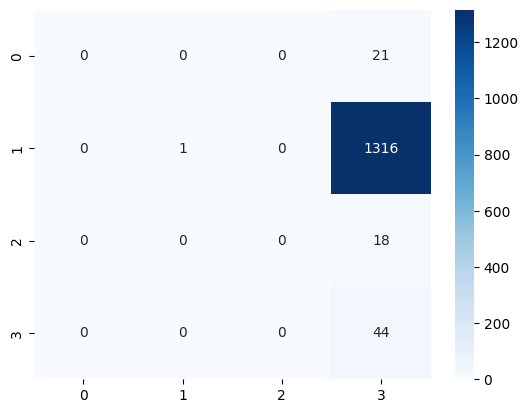

In [ ]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")


### Extracción de Caracteristicas por PCA


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
# Crear una instancia de PCA
pca = PCA(n_components=0.95)  # Especifica el número de componentes principales deseados

# Ajustar y transformar los d5atos
y_log = y_train
X_scaled = pca.fit_transform(X_train)  # Aplica PCA al conjunto de entrenamiento
test_X_scaled = pca.transform(X_test)  # Aplica PCA al conjunto de prueba


In [ ]:
# Crear el modelo
modelo_LGPCA = DecisionTreeClassifier()

# Entrenar el modelo con los datos de entrenamiento
modelo_LGPCA.fit(X_scaled, y_log)

# Obtener las predicciones del modelo en los datos de prueba
y_pred = modelo_LGPCA.predict(test_X_scaled)


# Calcular el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)


# Imprimir el accuracy del modelo
print("Accuracy: ",accuracy)

Accuracy:  0.9028571428571428


<Axes: >

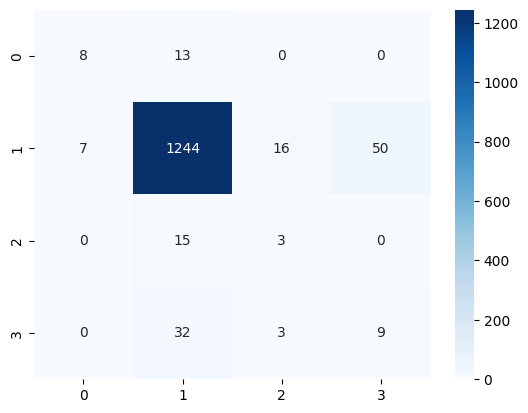

In [ ]:
# Obtener las predicciones del modelo en los datos de prueba
y_pred = modelo_LGPCA.predict(test_X_scaled)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el heatmap de la matriz de confusión
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
